Import libraries

In [38]:
import pandas as pd
import numpy as np

Read the Data

In [39]:
data = pd.read_csv('C:/Users/subha/OneDrive/Desktop/Project/data/electricity_dah_prices.csv')

In [40]:
data.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8761 non-null   object 
 1   hour     8761 non-null   object 
 2   france   8760 non-null   float64
 3   italy    8760 non-null   float64
 4   belgium  8760 non-null   float64
 5   spain    8760 non-null   float64
 6   uk       7319 non-null   float64
 7   germany  8760 non-null   float64
dtypes: float64(6), object(2)
memory usage: 547.7+ KB


In [42]:
data.shape

(8761, 8)

Check null values

In [43]:
data.isnull().sum()

date          0
hour          0
france        1
italy         1
belgium       1
spain         1
uk         1442
germany       1
dtype: int64

<Axes: >

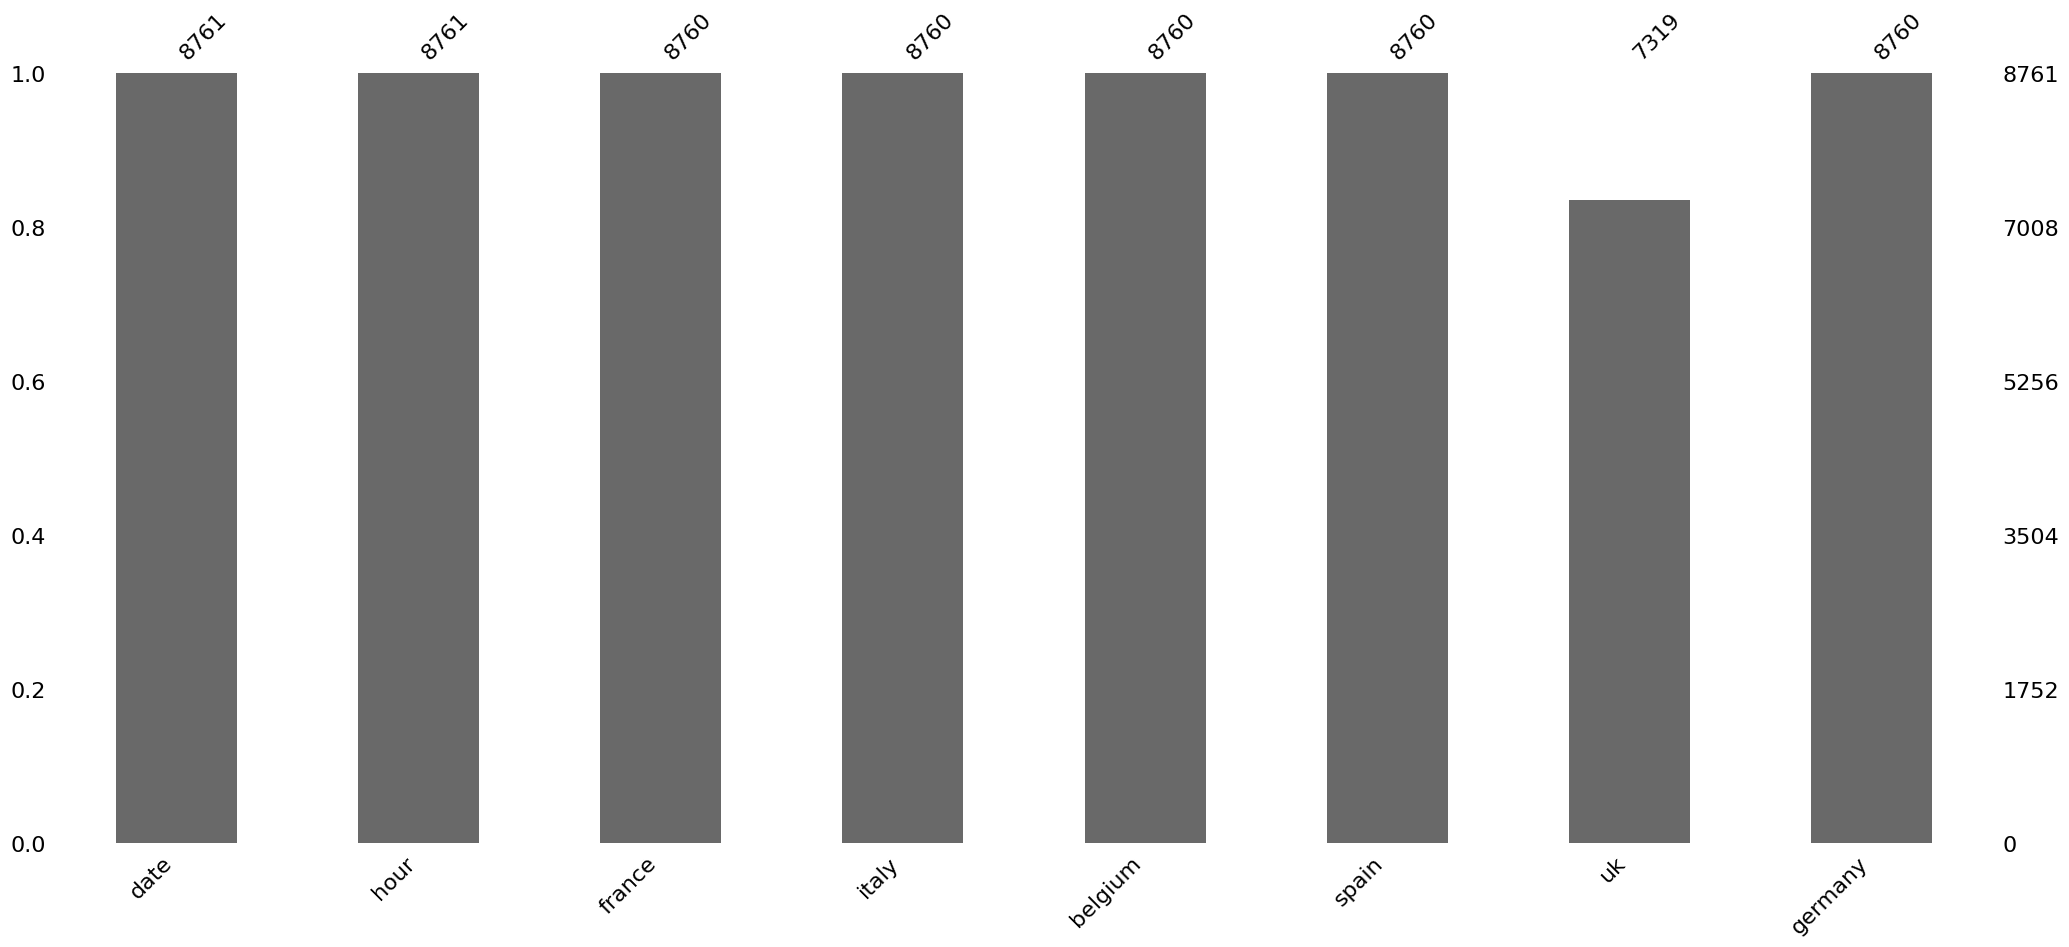

In [44]:
import missingno as msno

msno.bar(data)

<Axes: >

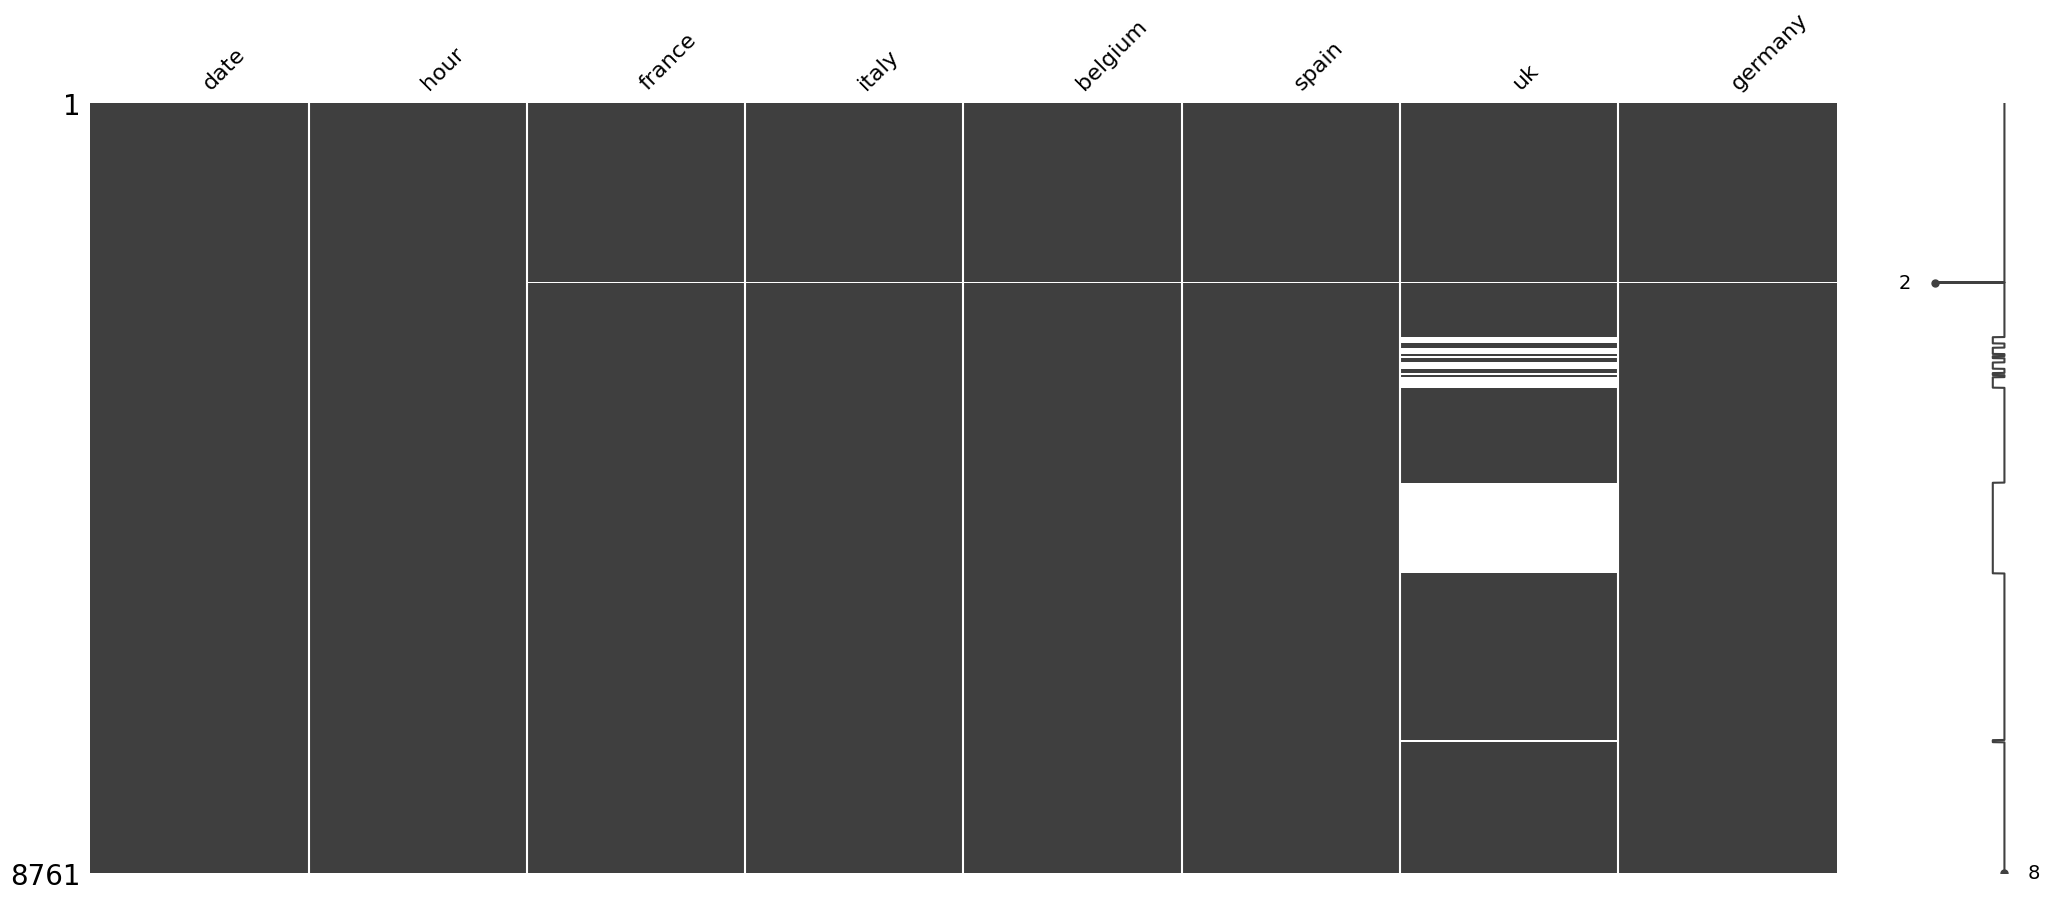

In [45]:
msno.matrix(data)

<Axes: >

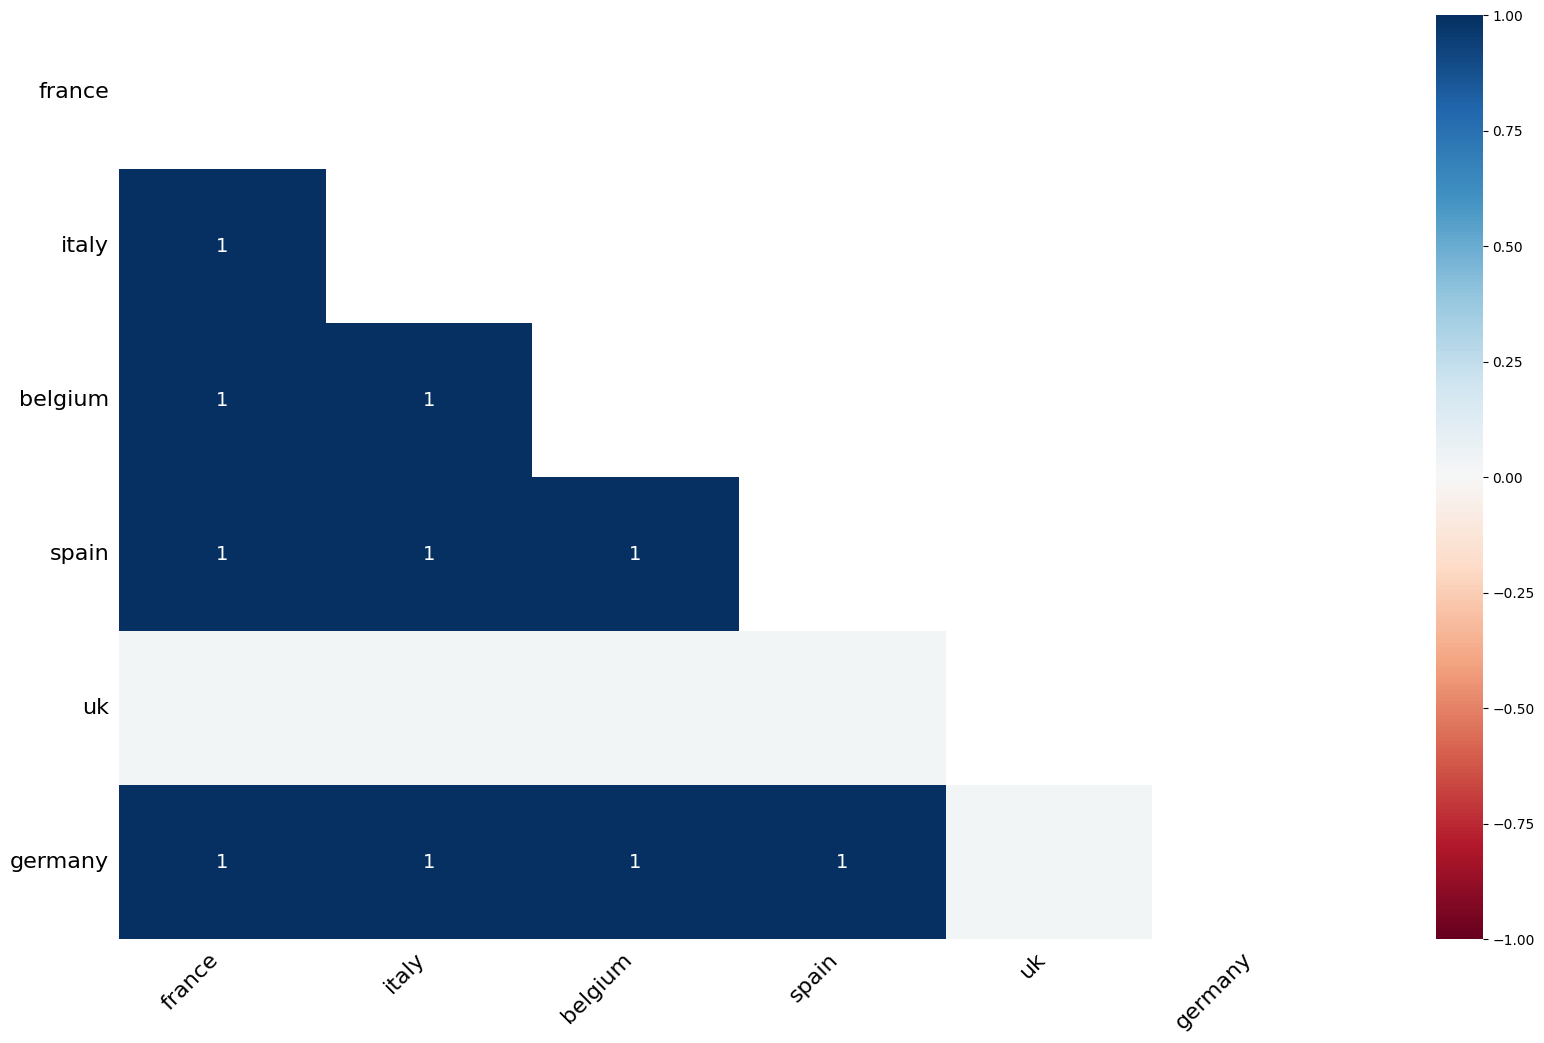

In [46]:
msno.heatmap(data)

Check duplicates

In [47]:
dups = data.duplicated()
print(dups.any())
print(data[dups])

False
Empty DataFrame
Columns: [date, hour, france, italy, belgium, spain, uk, germany]
Index: []


In [48]:
data2 = data.fillna(method='pad')
data2

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67
...,...,...,...,...,...,...,...,...
8756,2022/12/31,19:00 - 20:00,18.11,333.00,22.09,18.11,228.00,-1.01
8757,2022/12/31,20:00 - 21:00,7.60,310.00,10.55,7.60,204.38,-1.39
8758,2022/12/31,21:00 - 22:00,3.69,270.00,5.22,3.69,175.23,-1.04
8759,2022/12/31,22:00 - 23:00,1.88,217.78,2.39,1.88,177.39,-1.07


In [49]:
data2.isnull().sum()

date       0
hour       0
france     0
italy      0
belgium    0
spain      0
uk         0
germany    0
dtype: int64

array([[<Axes: title={'center': 'france'}>,
        <Axes: title={'center': 'italy'}>],
       [<Axes: title={'center': 'belgium'}>,
        <Axes: title={'center': 'spain'}>],
       [<Axes: title={'center': 'uk'}>,
        <Axes: title={'center': 'germany'}>]], dtype=object)

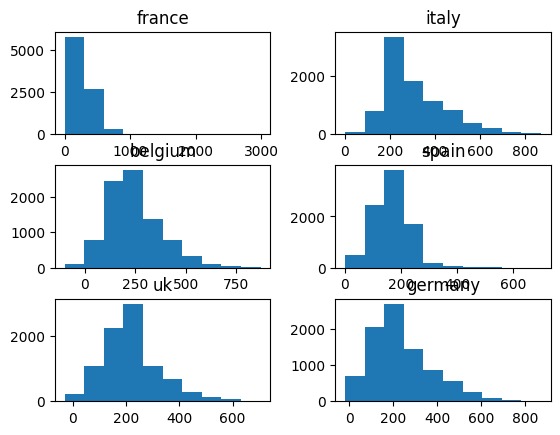

In [50]:
import seaborn as sns
data2.hist(grid=False)

check skewness

In [51]:
data2.skew()

C:\Users\subha\AppData\Local\Temp\ipykernel_10508\4039535641.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.skew()


france     2.178662
italy      1.073832
belgium    0.834792
spain      1.033559
uk         0.742153
germany    0.915851
dtype: float64

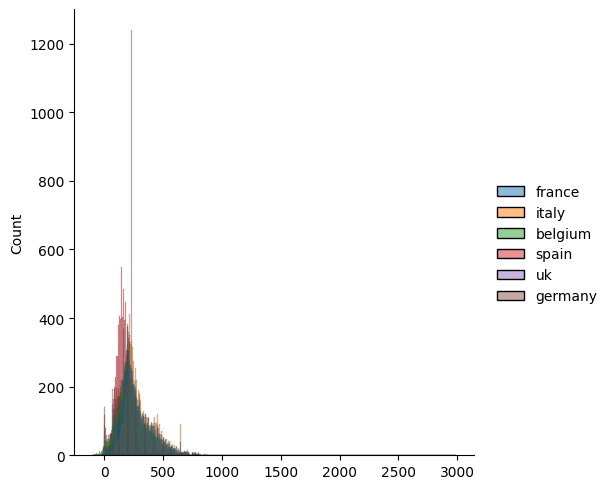

In [52]:
sns.displot(data2)

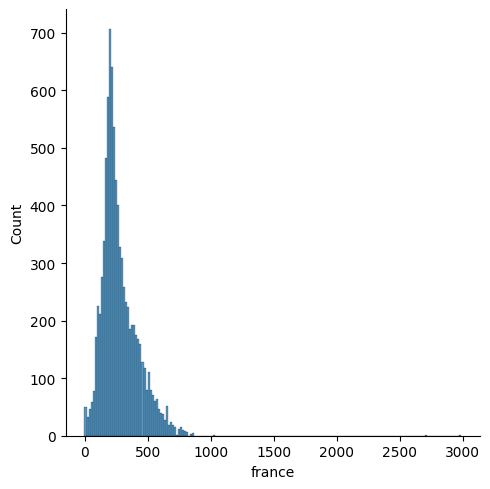

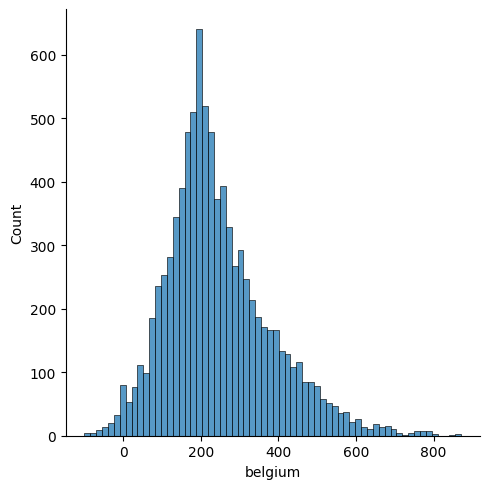

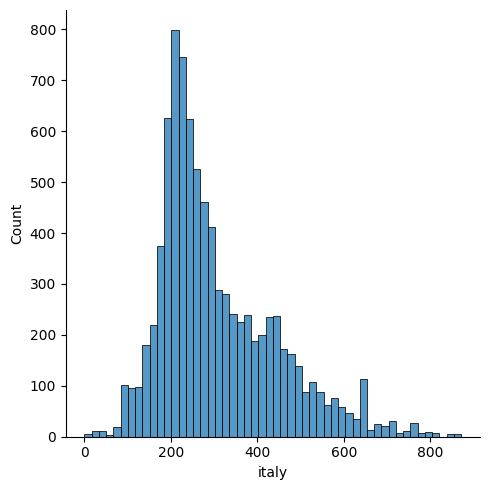

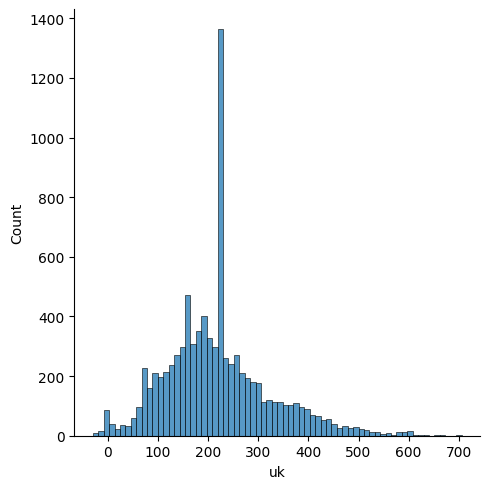

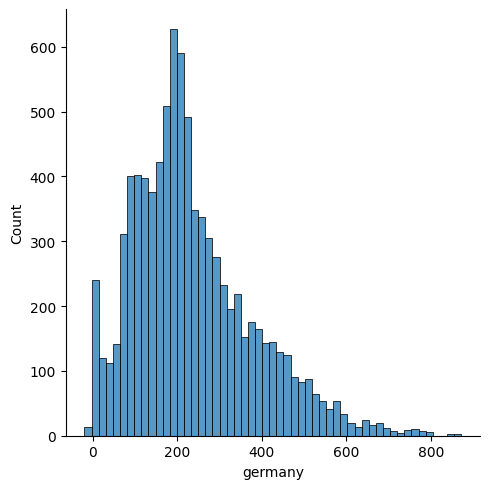

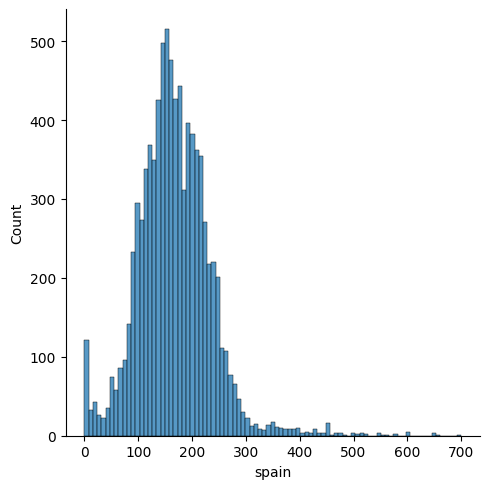

In [53]:
sns.displot(data2['france'])
sns.displot(data2['belgium'])
sns.displot(data2['italy'])
sns.displot(data2['uk'])
sns.displot(data2['germany'])
sns.displot(data2['spain'])



In [60]:
data2['sqrt_france']=np.sqrt(data2['france'])
data2['sqrt_italy']=np.sqrt(data2['italy'])

C:\Users\subha\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
sqrt_france.head()

0    9.437161
1    8.858894
2    9.228218
3    7.071068
4    6.137589
Name: france, dtype: float64

In [65]:
sqrt_france.skew()

0.29909652086221916

In [66]:
sqrt_italy.head()

0    13.049138
1    12.478782
2    12.128067
3     9.539392
4    10.198039
Name: italy, dtype: float64

In [67]:
sqrt_italy.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0       13.049138
1       12.478782
2       12.128067
3        9.539392
4       10.198039
          ...    
8756    18.248288
8757    17.606817
8758    16.431677
8759    14.757371
8760    14.142136
Name: italy, Length: 8761, dtype: float64>

In [70]:
data2.head()

,date,hour,france,italy,belgium,spain,uk,germany,sqrt_france,sqrt_italy
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05,9.437161,13.049138
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33,8.858894,12.478782
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22,9.228218,12.128067
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46,7.071068,9.539392
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67,6.137589,10.198039


In [72]:
data3=data2.drop(['france','italy'], axis=1)

In [73]:
data3

,date,hour,belgium,spain,uk,germany,sqrt_france,sqrt_italy
0,2022/01/01,00:00 - 01:00,82.02,145.86,0.27,50.05,9.437161,13.049138
1,2022/01/01,01:00 - 02:00,67.07,114.90,-0.01,41.33,8.858894,12.478782
2,2022/01/01,02:00 - 03:00,75.11,113.87,0.27,43.22,9.228218,12.128067
3,2022/01/01,03:00 - 04:00,50.91,97.80,-0.01,45.46,7.071068,9.539392
4,2022/01/01,04:00 - 05:00,37.67,97.80,-0.01,37.67,6.137589,10.198039
...,...,...,...,...,...,...,...,...
8756,2022/12/31,19:00 - 20:00,22.09,18.11,228.00,-1.01,4.255585,18.248288
8757,2022/12/31,20:00 - 21:00,10.55,7.60,204.38,-1.39,2.756810,17.606817
8758,2022/12/31,21:00 - 22:00,5.22,3.69,175.23,-1.04,1.920937,16.431677
8759,2022/12/31,22:00 - 23:00,2.39,1.88,177.39,-1.07,1.371131,14.757371


In [74]:
data3.skew()

C:\Users\subha\AppData\Local\Temp\ipykernel_10508\4103312983.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data3.skew()


belgium        0.834792
spain          1.033559
uk             0.742153
germany        0.915851
sqrt_france    0.299097
sqrt_italy     0.489645
dtype: float64

array([[<Axes: title={'center': 'belgium'}>,
        <Axes: title={'center': 'spain'}>],
       [<Axes: title={'center': 'uk'}>,
        <Axes: title={'center': 'germany'}>],
       [<Axes: title={'center': 'sqrt_france'}>,
        <Axes: title={'center': 'sqrt_italy'}>]], dtype=object)

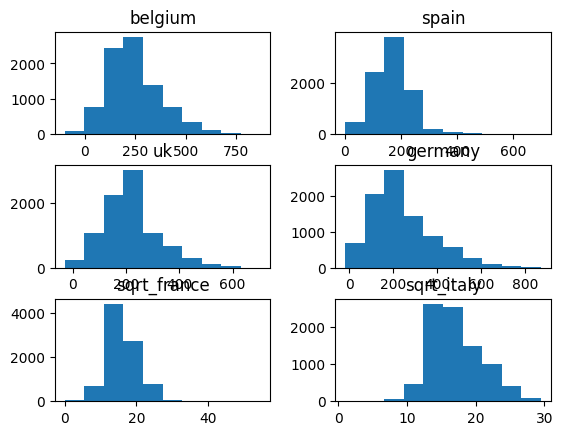

In [75]:
import seaborn as sns
data3.hist(grid=False)